# Classical Statistical Inference: Hypothesis testing

## Table of Content

- II. What is statistical inference ? See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)
    * II.3 [Hypothesis testing](#II.3-Hypothesis-testing) 
        - [II.3.1 Student's t test](#II.3.1.-Student's-t-test)
        - [II.3.2 Paired test to compare means ot 2 dependent populations](#II.3.2-Paired-test-to-compare-means-ot-2 dependent-populations)
        - [II.3.3 Paired test for means of 2 independent populations](#II.3.3-Paired-test-to-compare-means-of-2-independent-populations)
        - [II.3.4 What to do if the population distributions are not gaussian ?](#II.3.4-What-to-do-if-the-population-distributions-are-not-gaussian-?)
        - [II.3.5 Hypothesis testing for proportions](#II.3.5-Hypothesis-testing-for-proportions)
    * II.4 Bootstrap: See [Frequentist_inference_Bootstrap.ipynb](Frequentist_inference_Bootstrap.ipynb)
       - [II.4.1 Bootstrap confidence interval](#Bootstrap-Confidence-Interval) 
       - [II.4.2 Jacknife](#II.4.2-Jacknife)     
    * II.5 [Wrap up: Various approaches of hypothesis testing](#II.5-Wrap-up:-Various-approaches-of-hypothesis-testing)
    
- X. [References and supplementary material](#X)

### II.3 Hypothesis testing:

The concept is as it sounds: We start with some theory/model, that we call a **null hypothesis**, and we ask if the data provide sufficient evidence to reject the theory/model. If not, then we retain the model. 

In general the strategy consists in:
1. Write a null and an alternative hypothesis. The null hypothesis will be written in terms of population parameters. 
2. Calculate an appropriate test statistic. This will vary depending on the test, but it will typically be the difference observed in the sample divided by a standard error.
3. Determine a critical region where you would consider that the null hypothesis is True
4. Make a decision by determining if the test statistics falls in the critical region or not. This critical region can be based on the confidence interval, or based on the so-called *P-value*. The P-value is the smallest significance level $\alpha$ that leads us to rejecting the null hypothesis (i.e. if p is small we reject the null hypothesis). In other words, if **p-value < $\alpha$**, the test suggests that the observed data is *inconsistent* with the null hypothesis, so the **null hypothesis must be rejected**. 
5. Make a real-world decision

There is a large variety of hypothesis testing problems in astronomy: for example detection of a source (is this a source or background), classification of objects (is this a star or a galaxy), are these measurements randomly distributed or not, ... 

You don't have to consider the rejection of the null hypothesis as an all-or-nothing decision. The hypothesis test is rather like those old scales with two plates, each plate weighing one hypothesis or the other. The test gives you an indication of the "balancing side". It can in fact happen that your sample is such that you end up rejecting the null hypothesis while it is in fact True (**False negative** or *Type I* error). Conversely, it can happen that your accept the null hypothesis while it is in fact False (**False positive** or *Type II* error). It might seem that $\alpha$ is the probability of *False negative* (Type I errors) as the probability to reject the null hypothesis directly depends on $\alpha$, but this is not totally true. This is only true if $H_0$ is true. It is therefore the probability of Type I/false negative error *given that $H_0$ is true*. If the null hypothesis is false, then it is impossible to make a Type I error ! 

The rate of those errors obviously depends on the value of $\alpha$, but as the pdf generally have large tails, you can never certainly reject or accept $H_0$. This is also what makes often the use of (classical) hypothesis testing debatable, and in particular the interpretation of hypothesis testing results that often give overconfidence in the results.




#### II.3.1. Student's t-test

Consider that you have a detector (a CCD camera) and want to check that it follows the specifications sent by the manufacturer regarding its dark current. You have $N$ measurements of the dark current from which you derive a mean $\bar{x}$. The constructor tells you that the dark current is $x_{\rm{DC}}$ (but does not quote any uncertainty ...).    
You want to know if the population mean of your data is compatible with the value $x_{\rm {DC}}$ reported by the manufacturer or not. 

In this context, if the dark current is sufficiently large, you can assume that its distribution should be Gaussian. This is an assumption you need to do to apply this test. 
    
Your $H_0$ hypothesis is $\mu = x_{\rm{DC}} = \mu_0$. The alternative is the $H_A \neq x_{\rm{DC}}$. 

We know that the random variable 

$$
T = \frac{\bar{x}-\mu}{\hat{\sigma}/\sqrt{N}} 
$$

follows a Student's distribution with $N-1$ degrees of freedom (cf. [II.2.3](Frequentist_inference.ipynb/#II.2.3-Normal-distribution-with-unknown-variance) ).  

We can then use as, a test statistics, (i.e. test statistical quantity):
$$
T = \frac{\bar{x}-\mu_0}{\hat{\sigma}/\sqrt{N}} 
$$

We can then calculate the $P-$value associated to $T$. The $P-$value is the smallest confidence level $\alpha$ that would yield rejection of the null hypothesis. 

In `python`, this can be done using `scipy.stats.t.sf(x)` which is $(1-\rm{CDF})(x)$. (`sf` states for "survival function") so-called because it allows one to calculate $P(X \geq x)$, i.e. the probability for X to be larger that a given value $x$. This could be for example the probability that a patient/ a device/... will survive above a specified time $x$. 

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

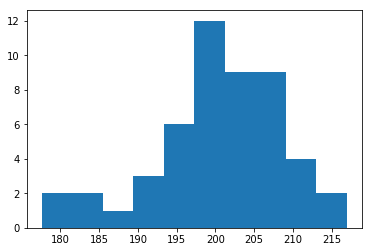

In [13]:
# Fix the seed to have an example that always works 
np.random.seed(12356)

npt = 50
x_DC = 200

# Create a fake sample of measurements (this is not part of the procedure ...)
r_sample = scipy.stats.norm.rvs(loc=200, scale=10, size=npt)   # I have 50 measurements, centered on 200, and with width 10
# Let's visualise the distribution of our sample of points 
qq = plt.hist(r_sample)

In [14]:
# Calculate the statistics for our problem 
T = ( np.mean(r_sample) - x_DC ) / ( np.std(r_sample, ddof=1) / np.sqrt(npt) ) 

# Student's distribution with n pts
tdist = scipy.stats.t(npt)

print('bar(x) = %.1f' %np.mean(r_sample))
print('Statistics T %.2f ' %T)

bar(x) = 200.4
Statistics T 0.31 


In [15]:
pval = scipy.stats.t.sf(np.abs(T), npt-1) * 2.  # two-sided pvalue = Prob(abs(t)>T)

# Another way to get the p-value is by using the cdf directly:

pval2 = (1-scipy.stats.t.cdf(np.abs(T), npt-1) ) * 2.

print('p-value (sf) = %.3f' %pval )
print('p-value (1-cdf) = %.3f' %pval)

p-value (sf) = 0.757
p-value (1-cdf) = 0.757


Now that we understand how this works, we can use the python implementation of this tests implemented in `scipy.stats`: 

``` python
scipy.stats.ttest_1samp(sample_observation, null_hypothesis_value)
```

In [17]:
Z, p = scipy.stats.ttest_1samp(r_sample, x_DC)

print("stat= %.2f and p-value= %.3f " %(Z, p))

stat= 0.31 and p-value= 0.757 


So, at a confidence level $\alpha = 0.05$, as $p > \alpha$, the null hypothesis must be accepted.

stat= -2.21 and p-value= 0.032 


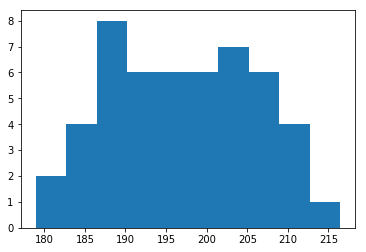

In [18]:
# Re run the example with 123456 as a seed
np.random.seed(123456)
x_DC, npt = 200, 50
# Generate a fake sample of measurements
r_sample = scipy.stats.norm.rvs(loc=200, scale=10, size=npt)   # I have 50 measurements, centered on 200, and with width 10
qq = plt.hist(r_sample) 

Z, p = scipy.stats.ttest_1samp(r_sample, x_DC)

print("stat= %.2f and p-value= %.3f " %(Z, p))

# Note: In this case we reject the null hypothesis at the 97% confidence level ! 


Note that if your alternative hypothesis is $\bar{x} > x_{DC}$  (i.e. you need a one sided test), then your p-value will be p/2 (or is directly given by `scipy.stats.t.sf(np.abs(T), npt-1)`). Because of the symmetry of the distribution, the same is true if your alternative is $\bar{x} < x_{DC}$.

#### II.3.2 Paired test to compare means ot 2 *dependent* populations

In general, one is interested to comparing the distributions of two independent populations, but there could be situations where comparing dependent populations is desirable. For example, imagine that observer 1 measures the photometry of 10 stars during some observing run, and that, at the same time, his colleague, using another instrument that we want to commission, does the same. If $\{x1\}$ is the ensemble of measurements of observer 1 and $\{x2\}$ those of observer 2, then how can we ensure that $\mu_{x1} = \mu_{x2}$ as the two populations are not independent ? 

The trick to deal with such data is to study the distribution of the difference between the corresponding pairs of random variables, namely $d_i = x1_i - x2_i$. In that case the null hypothesis involves just the single mean $\mu_d$ and the null hypothesis $H_0: \mu_d = \mu_0$ , and the alternative hypotheses $H_A: \mu_d \neq \mu_0$. 

Hence, we now face a "classic" Student's test as studied in the previous section. 

In `python`, this can be adressed :
- using the t-test *applied to the difference* between the two random variable, i.e. `scipy.stats.ttest_1samp(data_x2-data_x1, 0)`
- or using `stats.ttest_rel(data_x2, data_x1)` 


#### II.3.3 Paired test to compare means ot 2 *independent* populations

We now consider the case of two sets of measurements drawn from two independent populations with equal / un-equal variances. You can do it in python by providing directly your samples, or, the means, std and sample sizes:
    * `scipy.stats.ttest_ind()` : You give directly the samples
    * `scipy.stats.ttest_ind_from_stats()`: You give the mean, std and sample size

Then you have to specify wether you use the pooled-sample test or the Welsh test depending on wether you think that the variance of the populations are equals or not:
- pooled two-sample t-test: when the (unknown) population variances are equals: Set the argument `equal_var=True` 
- Welch's t-test : when the (unknown) population variances are *not* equals: Set the argument `equal_var=False`  

These tests are based on the confidence intervals we introduced in Sect. [II.2.5.](#CImean-diff) 
The null hypothesis in this case is $H_0: \mu_X - \mu_Y = 0$ and the alternative could be $H_1: \mu_X - \mu_Y \neq 0$  and follow our hypothesis testing procedure. 


In [19]:
# Generate our two fake samples
mu1, mu2=200, 200 
sig1, sig2 = 10, 10
n1, n2 = 50, 30
r_sample = scipy.stats.norm.rvs(mu1, sig1, n1)   # I have 50 measurements, centered on 200, and with width 10
r_sample2 = scipy.stats.norm.rvs(mu2, sig2, n2)
# The test
Z, p = scipy.stats.ttest_ind(r_sample, r_sample2, equal_var=True)

print("stat= %.2f and p-value= %.3f " %(Z, p) )

stat= -2.09 and p-value= 0.040 


Unfortunatelly, you do not always know if the two underlying populations are really drawn from populations with the same variance. You may need them to first have a look to the estimator of your variance based on your sample to pick your test. When unsure, picking the Welsh t-test is a conservative choice. 

In [20]:
mu_hat1, mu_hat2 = r_sample.mean(), r_sample2.mean()
std_hat1, std_hat2 = r_sample.std(), r_sample2.std()
print('mu1, sig1 = (%.2f, %.2f) and mu2, sig2 = (%.2f, %.2f) ' %(mu_hat1, std_hat1, mu_hat2, std_hat2) )
Z_W, p_W = scipy.stats.ttest_ind_from_stats(mu_hat1, std_hat1, n1, mu_hat2, std_hat2, n2, equal_var=False)
print("Welsh: stat= %.2f and p-value= %.3f " %(Z_W, p_W))

mu1, sig1 = (198.55, 10.89) and mu2, sig2 = (204.05, 11.82) 
Welsh: stat= -2.07 and p-value= 0.043 


#### II.3.4 What to do if the population distributions are not gaussian ? 

There exists an alternative to the 2-samples student's t-test that relaxes the assumption that the original distribution is gaussian. This test is called **Mann–Whitney U test** (or Mann–Whitney–Wilcoxon MWW) and is implemented in `scipy.stats.mannwhitneyu()`.

*Warning*: There are some subtelties with this test that requires a minimum size of the sample, and yields different results if the alternative is  $\mu_1 > \mu_2 $ or $\mu_1 < \mu_2 $. 

In [21]:
# Application of the Mann–Whitney U test on the sample above

Z_MWU, p_MWU = scipy.stats.mannwhitneyu(r_sample, r_sample2, alternative='two-sided')

print("For our first sample stat= %.2f and p-value= %.3f " %(Z_MWU, p_MWU))

For our first sample stat= 564.00 and p-value= 0.065 


In [22]:
# Application to a sample drawn from a Poisson distribution
# Fix the seed to have an example that always works 
np.random.seed(12356)
Npts = 100
Npts2 = 80

# Generate a fake sample of measurements
r_sample_nw = scipy.stats.poisson.rvs(10, size=Npts)   
r_sample_nw2 = scipy.stats.poisson.rvs(11, size=Npts2)
Z, p = scipy.stats.mannwhitneyu(r_sample_nw, r_sample_nw2, alternative='two-sided')

print("***************************")
print("Poisson sample")
print("Mann-Whitney U-test: stat= %.2f and p-value= %.3f " %(Z, p))
print("WARNING: check that nsamples > 20 ")
# Abusive use of Welsh test
Z_W, p_W = scipy.stats.ttest_ind(r_sample_nw, r_sample_nw2, equal_var=False)
print("Welsh (assumes gaussianity): stat= %.2f and p-value= %.3f " %(Z_W, p_W))

***************************
Poisson sample
Mann-Whitney U-test: stat= 3771.00 and p-value= 0.509 
Welsh (assumes gaussianity): stat= -0.93 and p-value= 0.354 


#### II.3.5 Hypothesis testing for proportions


You may for example want to test if the sample of galaxies you have selected/observed is biased (or not) towards a specific galaxy type. For example, you know that the fraction of elliptical galaxies at a given redshift is 20%, but you have selected a sample of 100 galaxies and count 34 elliptical. You wonder if your sample is compatible with the parent population or not. 

Your null hypothesis is that the fraction of elliptical galaxies is effectively 20% (i.e. the one of the parent population), and $H_1$ that $p \neq 0.2$ (your sample is biased). 

You can define the following statistics: 

$$
Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 \, (1-p_0)} {n} }}
$$

where $p_0$ is the value of the probability under the null hypothesis (i.e. $p_0 = 0.2$).



In [23]:
p_hat = 0.34    # Observed proportion of elliptical galaxies
p0 = 0.2        # proportion we want to compare to
n=100   
z = (p_hat-p0) / (np.sqrt(p0 * (1-p0) / n ))
print(z)
p_value = 2.*(1-scipy.stats.norm.cdf(np.abs(z)))    # Do not forget to take abs(z)

print('p-value = %.4f' %p_value)

# Ideally, p0 is known to be drawn from a sample as well and would then make a two-sample test. 

3.5000000000000004
p-value = 0.0005


Hence, we can reject $H_0$ at more than 99% confidence  

## II.5 Wrap up: Various approaches of hypothesis testing

### Is a coin fair ?  

In [24]:
# From http://people.duke.edu/~ccc14/sta-663/ComputationalStatisticsMotivation.html

# Simulating data
n = 100
pcoin = 0.62 # actual value of p for coin
results = scipy.stats.bernoulli(pcoin).rvs(n)
h = sum(results)
print("Number of successes", h)

# Expected distribution for fair coin
p = 0.5
rv = scipy.stats.binom(n, p)
mu = rv.mean()
sd = rv.std()
print("Expectations for a fair coin: mu=%.2f std=%.2f" %(mu, sd) )

Number of successes 62
Expectations for a fair coin: mu=50.00 std=5.00


### II.5.1 Binomial test

Hypothesis testing framework.

In [25]:
p_value = scipy.stats.binom_test(h, n, p)
print("p-value for the binomial test =%.5f" %p_value)

p-value for the binomial test =0.02098


### II.5.2 Using z-test approximation 

Use of approximation when true solution is computationally expensive.
A z-test is devised for a (continuous) normally distributed variable, while here we look to the mean and std drawn from a binomial variable. So it consists in approximating a continous distribution with a discrete one. In such a case it is necessary to apply a so-called "continuity correction", which, in case where the original distribution is binomial, consists simply in removing 0.5 from the original random variable. 

In [26]:
z = (h-0.5-mu)/sd
print(z)

2.3


In [27]:
p_value_z = 2*(1 - scipy.stats.norm.cdf(z))  # (1-scipy.stats.norm.cdf(z)) gives you alpha/2
print("p-value for the z-test =%.5f" %p_value)

p-value for the z-test =0.02098


### II.5.3 Using simulation to estimate null distribution

When we do not have any theory, we can use simulations. Here, we can make a simulation that our coin is fair and calculate the probability to observe the fraction of times we have a number of successes $h$ as large as the observed one (i.e. the probability for our hypothesis to be true).  

In [28]:
nsamples = 100000
xs = np.random.binomial(n, p, nsamples)

In [29]:
2*np.sum(xs >= h)/(xs.size + 0.0)  # times 2 because np.sum(xs >= h)/(xs.size) -> alpha/2

0.02134

### II.5.4 Using bootstrap to estimate confidence intervals for pcoin

See [Frequentist_inference_bootstrap.ipynb](Frequentist_inference_bootstrap.ipynb) for a description of the bootstrap approach    
Interval estimate of parameters using bootstrap

In [30]:
bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()
print("Bootstrap (percentile) CI: (%.4f, %.4f)" % (bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)]))

Bootstrap (percentile) CI: (0.5200, 0.7100)


## X. References and supplementary material: <a class="anchor" id="X"></a>

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  ** STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9**

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

Other useful references to know more about the topics covered in this lecture: 

- More tests and hypothesis testing: https://onlinecourses.science.psu.edu/stat414/node/290 ; https://onlinecourses.science.psu.edu/stat200/node/51 

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.
